<a href="https://colab.research.google.com/github/Nagajyothi83/3-2-data-science/blob/main/logrithamic_%26_curvilinear_%2Cadvanced_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

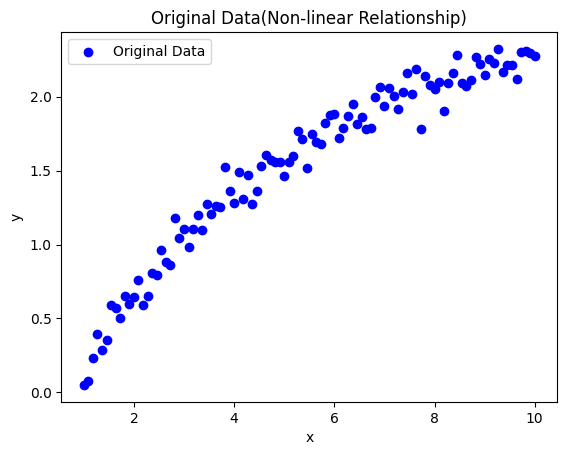

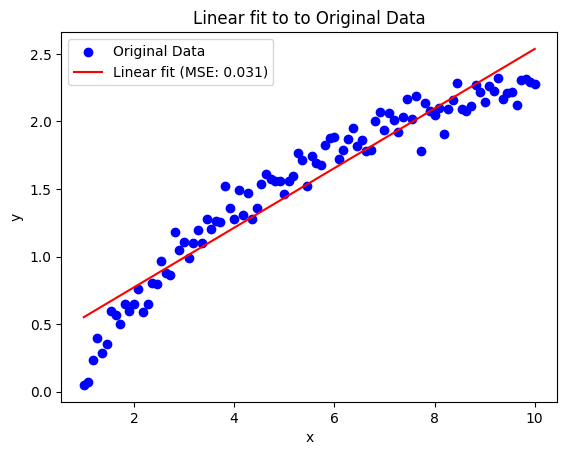

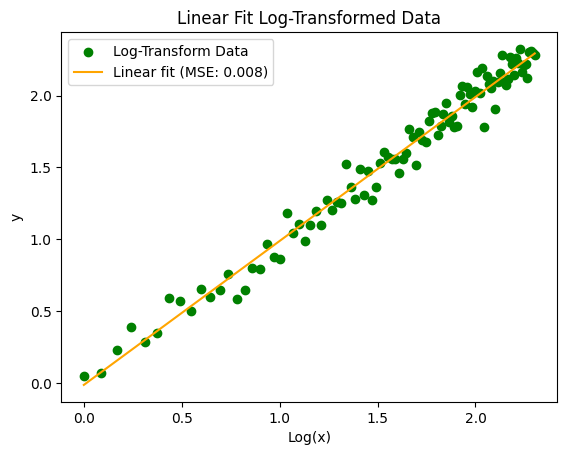

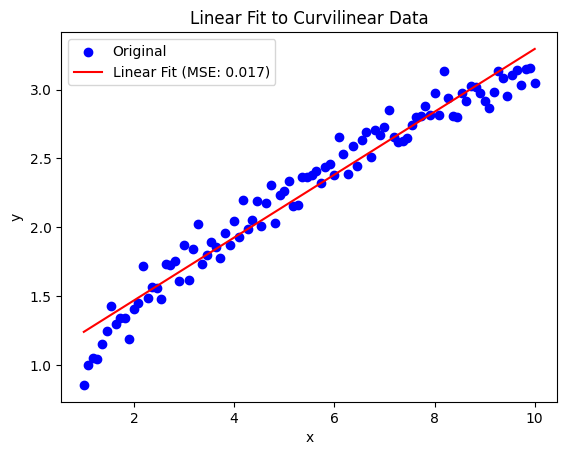

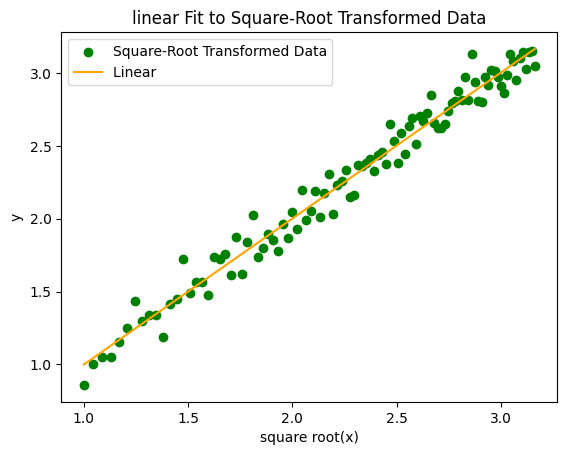

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(42)
x = np.linspace(1,10,100).reshape(-1,1)
y = np.log(x).ravel() + np.random.normal(0,0.1,x.shape[0])
plt.scatter(x,y,color="blue",label="Original Data")
plt.title("Original Data(Non-linear Relationship)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
linear_model_original = LinearRegression()
linear_model_original.fit(x,y)
y_pred_original = linear_model_original.predict(x)
mse_original = mean_squared_error(y,y_pred_original)
x_log = np.log(x)
linear_model_log = LinearRegression()
linear_model_log.fit(x_log,y)
y_pred_log = linear_model_log.predict(x_log)
mse_log = mean_squared_error(y,y_pred_log)
plt.scatter(x,y,color="blue",label="Original Data")
plt.plot(x,y_pred_original, color="red",label=f"Linear fit (MSE: {mse_original:.3f})")
plt.title("Linear fit to to Original Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
plt.scatter(x_log,y,color="green",label="Log-Transform Data")
plt.plot(x_log,y_pred_log,color="orange",label=f"Linear fit (MSE: {mse_log:.3f})")
plt.title("Linear Fit Log-Transformed Data")
plt.xlabel("Log(x)")
plt.ylabel("y")
plt.legend()
plt.show()
x_curve = np.linspace(1,10,100).reshape(-1,1)
y_curve = np.sqrt(x_curve).ravel() + np.random.normal(0,0.1,x_curve.shape[0])
linear_model_curve = LinearRegression()
linear_model_curve.fit(x_curve,y_curve)
y_pred_curve = linear_model_curve.predict(x_curve)
mse_curve = mean_squared_error(y_curve,y_pred_curve)
x_sqrt =  np.sqrt(x_curve)
linear_model_sqrt = LinearRegression()
linear_model_sqrt.fit(x_sqrt,y_curve)
y_pred_sqrt = linear_model_sqrt.predict(x_sqrt)
plt.scatter(x_curve,y_curve,color="blue", label="Original")
plt.plot(x_curve,y_pred_curve,color="red", label=f"Linear Fit (MSE: {mse_curve:.3f})")
plt.title("Linear Fit to Curvilinear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
plt.scatter(x_sqrt,y_curve, color="green", label="Square-Root Transformed Data")
plt.plot(x_sqrt,y_pred_sqrt, color="orange", label=f"Linear ")
plt.title("linear Fit to Square-Root Transformed Data")
plt.xlabel("square root(x)")
plt.ylabel("y")
plt.legend()
plt.show()




Linear Regression:
 Train MSE: 0.7675
 Test MSE: 1.0293
 Coefficients: [ 4.873716   -2.98576626  2.00587222 -0.17422585 -0.05016444  0.03390969
 -0.06326209  0.12753783 -0.13041584 -0.05700916 -0.10742368  0.00706467
  0.05072823 -0.1529179  -0.02163539 -0.02860998  0.10358737 -0.00640345
  0.16720115  0.09694611]

Linear Regression:
 Train MSE: 0.7675
 Test MSE: 1.0293
 Coefficients: [ 4.873716   -2.98576626  2.00587222 -0.17422585 -0.05016444  0.03390969
 -0.06326209  0.12753783 -0.13041584 -0.05700916 -0.10742368  0.00706467
  0.05072823 -0.1529179  -0.02163539 -0.02860998  0.10358737 -0.00640345
  0.16720115  0.09694611]

Ridge Regression (alpha=1):
 Train MSE: 0.7761
 Test MSE: 1.0014
 Coefficients: [ 4.78168427 -2.93772693  1.99271179 -0.15482627 -0.05170297  0.03825949
 -0.06576139  0.12085919 -0.13312683 -0.06219846 -0.11576059  0.01419869
  0.04770067 -0.16863899 -0.00555979 -0.02951614  0.09795815 -0.01275882
  0.18003161  0.09879589]

Linear Regression:
 Train MSE: 0.7675
 T

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

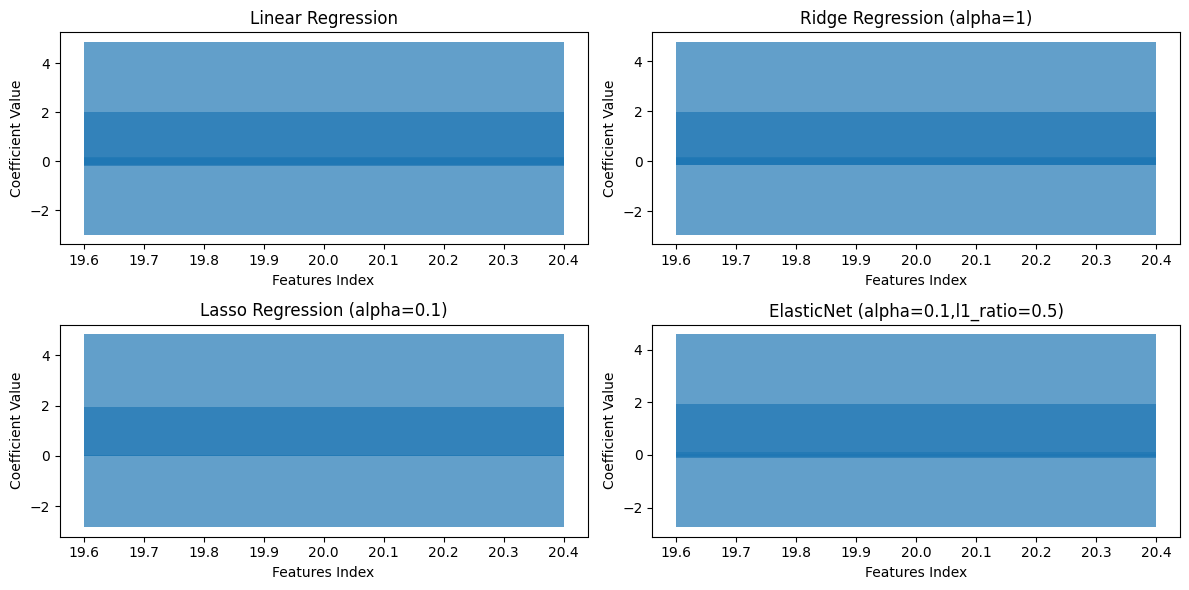

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#generate synthetic data with high dimensional features
np.random.seed(42)
n_samples,n_features = 100,20
x = np.random.randn(n_samples,n_features)
true_coefficient = np.array([5,-3,2] + [0]*(n_features -3))
y = x.dot(true_coefficient) + np.random.normal(0,1,n_samples)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
models = {
    "Linear Regression": LinearRegression(),"Ridge Regression (alpha=1)":Ridge(alpha=1),"Lasso Regression (alpha=0.1)": Lasso(alpha=0.1),"ElasticNet (alpha=0.1,l1_ratio=0.5)": ElasticNet(alpha=0.1,l1_ratio=0.5),
}
#train
results = {}
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  train_mse = mean_squared_error(y_train,y_pred_train)
  test_mse=mean_squared_error(y_test,y_pred_test)
  results[name] = {
      "Train MSE": train_mse,"Test MSE": test_mse,"Coefficients": model.coef_,
  }
  for name,result in results.items():
    print(f"{name}:")
    print(f" Train MSE: {result['Train MSE']:.4f}")
    print(f" Test MSE: {result['Test MSE']:.4f}")
    print(f" Coefficients: {result['Coefficients']}\n")
  plt.figure(figsize=(12,6))
for i, (name,result) in enumerate(results.items(), start=1):
  plt.subplot(2,2,i)
  plt.bar (n_features,result["Coefficients"],alpha=0.7)
  plt.title(name)
  plt.xlabel("Features Index")
  plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()




<ipython-input-2-5964bd90891a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-2-5964bd90891a>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[90 15]
 [21 53]]


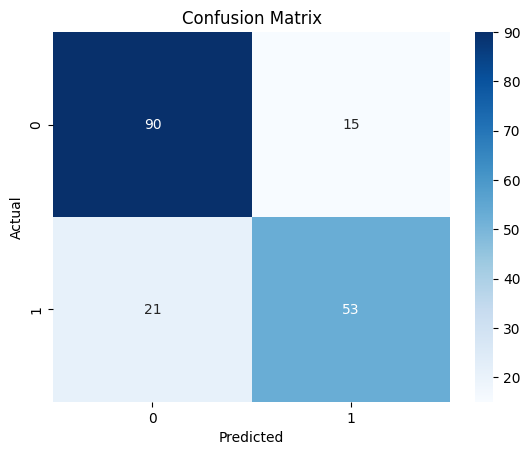

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Fixing errors in data preprocessing
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
titanic.drop(columns=['deck'], inplace=True)

# Encoding categorical variables
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embark_town'] = titanic['embark_town'].map({'Southampton': 1, 'Queenstown': 2})

# Selecting features
features = ['pclass', 'sex', 'age', 'fare', 'embark_town']
x = titanic[features]
y = titanic['survived']

# Handling missing values
x.fillna(x.median(), inplace=True)

# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
single_input = np.array([[3,0,25,7.25,0]])
single_input = scaler.transform(single_input)
output = model.predict(single_input)
print("Predicted Survival (0=No,1=Yes):",output[0])